# Electric Vehicle Population Data for Washington State

### Current registered EVs in the State of Washington according to Washington State Department of Licensing (DOL)


## <ins>Introduction: Cleaning and exploring the dataset</ins>

In [152]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import hvplot.pandas 
import holoviews as hv

In [2]:
df = pd.read_csv('./csv/Electric_Vehicle_Population_Data.csv')

print(len(df.columns))
print(df.info())
df.head(1)

17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247344 entries, 0 to 247343
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         247344 non-null  object 
 1   County                                             247340 non-null  object 
 2   City                                               247340 non-null  object 
 3   State                                              247344 non-null  object 
 4   Postal Code                                        247340 non-null  float64
 5   Model Year                                         247344 non-null  int64  
 6   Make                                               247344 non-null  object 
 7   Model                                              247344 non-null  object 
 8   Electric Vehicle Type                              247344 non-null  obj

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


### Checking various columns to see how many unique values there are
some of these columns Ill probably be able to convert to categories instead of strings/objects for better performance
Also based on the info method call above, and looking at column types, I might convert other column types where it makes sense

As an example, some of the float columns would make more sense if they are ints, i.e. postal code

In [3]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()


array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [4]:
df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [77]:
df['Make'].unique()

array(['NISSAN', 'KIA', 'TESLA', 'JEEP', 'FORD', 'FIAT', 'AUDI',
       'CHEVROLET', 'PORSCHE', 'HYUNDAI', 'BMW', 'RIVIAN', 'MAZDA',
       'POLESTAR', 'TOYOTA', 'VOLVO', 'SUBARU', 'LEXUS', 'MINI', 'HONDA',
       'MERCEDES-BENZ', 'CHRYSLER', 'VOLKSWAGEN', 'ALFA ROMEO', 'SMART',
       'JAGUAR', 'CADILLAC', 'LINCOLN', 'MITSUBISHI', 'DODGE',
       'LAND ROVER', 'ACURA', 'GMC', 'GENESIS', 'LUCID', 'FISKER',
       'VINFAST', 'LAMBORGHINI', 'TH!NK', 'MULLEN AUTOMOTIVE INC.',
       'ROLLS-ROYCE', 'BENTLEY', 'BRIGHTDROP', 'AZURE DYNAMICS', 'RAM',
       'WHEEGO ELECTRIC CARS'], dtype=object)

In [6]:
df['State'].unique()

array(['WA', 'BC', 'CA', 'NY', 'OR', 'WY', 'CO', 'MD', 'FL', 'NC', 'MN',
       'VA', 'AZ', 'IL', 'NJ', 'GU', 'TX', 'NE', 'MO', 'IN', 'MA', 'AP',
       'MI', 'GA', 'ID', 'UT', 'DC', 'SC', 'CT', 'AR', 'RI', 'NV', 'PA',
       'KS', 'LA', 'OK', 'AL', 'HI', 'KY', 'NH', 'OH', 'NM', 'TN', 'ME',
       'WI', 'DE', 'NS', 'MS', 'AK'], dtype=object)

In [7]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

Converting columns

In [78]:
df['State'] = df['State'].astype('category')
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].astype('category')
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype('category')
df['Postal Code'] = df['Postal Code'].astype('Int64')
df['Electric Range'] = df['Electric Range'].astype('Int64')
df['Legislative District'] = df['Legislative District'].astype('Int64')



Adding extra region column for comparison later

In [81]:
north_america = ['TESLA', 'JEEP', 'FORD', 'CHEVROLET', 'RIVIAN', 'CHRYSLER', 'CADILLAC', 'LINCOLN', 'DODGE', 'GMC', 'LUCID', 'FISKER', 'MULLEN AUTOMOTIVE INC.', 'BRIGHTDROP', 'RAM', 'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS']
asia = ['NISSAN', 'KIA', 'HYUNDAI', 'MAZDA', 'TOYOTA', 'SUBARU', 'LEXUS', 'HONDA', 'MITSUBISHI', 'ACURA', 'GENESIS', 'VINFAST']
europe = ['FIAT', 'AUDI', 'PORSCHE', 'BMW', 'POLESTAR', 'VOLVO', 'MINI', 'MERCEDES-BENZ', 'VOLKSWAGEN', 'ALFA ROMEO', 'SMART', 'JAGUAR', 'LAND ROVER', 'LAMBORGHINI', 'TH!NK', 'ROLLS-ROYCE', 'BENTLEY']
def region_check(car_make):
    if car_make in north_america:
        return 'North America'
    elif car_make in asia:
        return 'Asia'
    else:
        return 'Europe'


df['Region'] = df['Make'].apply(region_check)

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Region
0,1N4BZ0CP5G,King,Seattle,WA,98125,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0.0,46,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,Asia
1,KNDJX3AEXG,King,Renton,WA,98058,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950.0,11,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,Asia
2,5YJ3E1EB2J,King,Seattle,WA,98115,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0.0,43,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,North America
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0.0,26,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10,North America
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0.0,35,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10,North America


## Doing some exploration


### Bar Plot of number of EVs for Each Model Year

In [169]:
print(df['Make'].nunique())
print(df['Model Year'].unique())

# fig = plt.figure(figsize=(10,5))
# ax = fig.gca()

# sns.countplot(data=df, x='Model Year', ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# ax.set_ylabel('Number of EVs')

filtered_df = df.groupby('Model Year').agg({'VIN (1-10)':'count'})
filtered_df.reset_index(inplace=True)
filtered_df.rename(columns={'VIN (1-10)': 'Number of EVs'}, inplace=True)
filtered_df.head()
hv_bar_plot = filtered_df.hvplot.bar(x='Model Year', 
                                    y='Number of EVs', 
                                    C='Count', 
                                    cmap='BuPu', 
                                    xlabel='Model Year', 
                                    ylabel='Number of Registered EVs (Log Scale)', 
                                    title='Number of Registered EVs in WA Per Model Year',
                                    logy=True).opts(
                                        show_grid=True
                                    )

textbox = hv.Text(
    x=2001, y=120,
    text='*Unit increase in Y = 10× more EVs'
).opts(
    text_align='left',
    text_font_size='10pt',
    bgcolor='white'
)

(hv_bar_plot * textbox)


46
[2016 2018 2024 2015 2019 2020 2012 2013 2022 2023 2017 2014 2021 2000
 2025 2011 2026 2010 2008 2002 2003]


:Overlay
   .Bars.I :Bars   [Model Year]   (Number of EVs)
   .Text.I :Text   [x,y]

## HeatMap of EVs in Washington State Counties

39
      County  VIN (1-10)
0       King      122819
1  Snohomish       30587
2     Pierce       20534
3      Clark       15048
4   Thurston        9081
5     Kitsap        8375
6    Spokane        6971
7    Whatcom        6030
8     Benton        3320
9     Skagit        2843
46


<Axes: xlabel='Region', ylabel='County'>

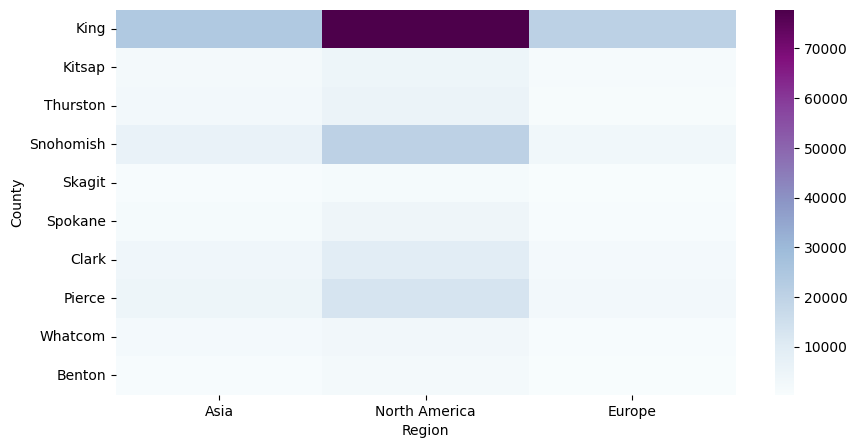

In [116]:
print(df[df['State'] == 'WA']['County'].nunique())

df_wa_counties = df[df['State'] == 'WA']

df_top_10_counties_ev_wa = df_wa_counties.groupby('County').agg({'VIN (1-10)':'count'}).nlargest(10, 'VIN (1-10)')
df_top_10_counties_ev_wa.reset_index(inplace=True)
print(df_top_10_counties_ev_wa)

print(df_wa_counties['Make'].nunique())

df_wa_counties = df_wa_counties[df_wa_counties['County'].isin(df_top_10_counties_ev_wa['County'])]

heat_map_data = df_wa_counties.pivot_table(index="County", columns="Region", values='VIN (1-10)', aggfunc='count', fill_value=0, sort=False)
# heat_map_data_norm = heat_map_data.apply(lambda x: x**2)
# heat_map_data_norm.head(20)


# heat_map_data.fillna(0)

fig = plt.figure(figsize=(10,5))
ax = fig.gca()
sns.heatmap(heat_map_data, ax=ax, cmap='BuPu')

In [131]:
# heat_map_data.index.name = 'County'
# heat_map_data.columns.name = 'Region'

heat_map_long = heat_map_data.reset_index().melt(
    id_vars='County',
    var_name='Region',
    value_name='Count'
)
# print(heat_map_long.head())  # Should have columns: 'County', 'Region', 'Count'


hmap = heat_map_long.hvplot.heatmap(x='Region', 
                                    y='County', 
                                    C='Count', 
                                    cmap='BuPu', 
                                    xlabel='EV Car Model Origin', 
                                    ylabel='Washington State County', 
                                    title='Top 10 EV Populated Counties in WA and the Regions of EV Origin',
                                    colorbar=True)
hmap

:HeatMap   [Region,County]   (Count)

In [59]:
print(df[df['State'] == 'WA']['Model Year'].nunique())
print(df['Model Year'].nunique())

21
21
